<a href="https://colab.research.google.com/github/wel51x/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [0]:
def sqrt(n):
  return n ** 0.5

def variance(xs):
  mean = sum(xs)/len(xs)
  differences = [(x-mean)**2 for x in xs]
  return sum(differences)/len(differences)
  
def stdev(xs):
  return sqrt(variance(xs))
  
def zscore(x, n):
  mean = sum(n) / len(n)
  z = (x - mean) / stdev(n) 
  return z  
  
def find_outliers(n, threshold=1):

  outliers = []
  
  for l in n: 
    if abs(zscore(l, n)) > threshold:
      outliers.append(l)
  return outliers
     

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
print("Sales:", sales)

Sales: [3505, 2400, 3027, 2798, 3700, 3250, 2689]


In [0]:
sales_mean = sum(sales)/len(sales)
sales_variance = variance(sales)
sales_stdev = stdev(sales)
print("Mean:", sales_mean)
print("Variance:", sales_variance)
print("Std Dev:", sales_stdev)

Mean: 3052.714285714286
Variance: 183761.06122448976
Std Dev: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
ncusts = [127, 80, 105, 92, 120, 115, 93]

In [0]:
cov_sales_custs = np.cov(sales, ncusts)
print("Covarience Sales:Custoners")
cov_sales_custs

Covarience Sales:Custoners


array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
ncusts_mean = sum(ncusts)/len(ncusts)
ncusts_variance = variance(ncusts)
ncusts_stdev = stdev(ncusts)
print("Mean:", ncusts_mean)
print("Variance:", ncusts_variance)
print("Std Dev:", ncusts_stdev)

#corr_coeff_sales_custs = cov_sales_custs / (sales_stdev * ncusts_stdev)
#print("Correlation Coefficient Sales:Custoners\n", corr_coeff_sales_custs)
corr_coeff_sales_custs = np.corrcoef(sales, ncusts)[0, 1]
print("Correlation Coefficient Sales:Custoners", corr_coeff_sales_custs)


Mean: 104.57142857142857
Variance: 249.3877551020408
Std Dev: 15.792015549069118
Correlation Coefficient Sales:Custoners 0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col=[0])
titanic.head()
#later

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
titanic.isnull().sum()

pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [0]:
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


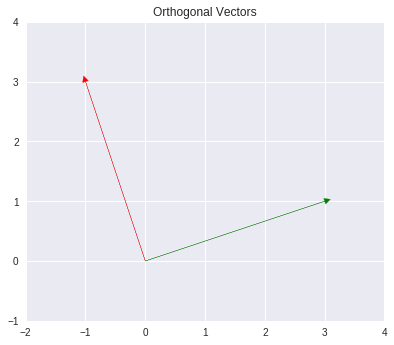

In [0]:
vector_1 = [-1, 3]
vector_2 = [3, 1]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.1, head_length=0.1, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.1, head_length=0.1, color ='green')
plt.xlim(-2,4)          
plt.ylim(-1,4)
plt.title("Orthogonal Vectors")
# Fix Axes
plt.axes().set_aspect('equal')
plt.show()


In [0]:
if np.dot(vector_1, vector_2) == 0:
  print("dot product of\n", vector_1, "\nand\n", vector_2, "\nis zero, hence the vectors are orthogonal (or perpendicular)")

dot product of
 [-1, 3] 
and
 [3, 1] 
is zero, hence the vectors are orthogonal (or perpendicular)


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
vector_a = [-5, 3, 7]
vector_b = [6, -8, 2]
dot_a_b = np.dot(vector_a, vector_b)
if dot_a_b != 0:
  print("dot product of\n", vector_a, "\nand\n", vector_b, "\nis", dot_a_b, ", hence the vectors are not orthogonal (or perpendicular)")

dot product of
 [-5, 3, 7] 
and
 [6, -8, 2] 
is -40 , hence the vectors are not orthogonal (or perpendicular)


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
vector_c = [2, -15, 6, 20]
vector_c_norm = np.linalg.norm(vector_c)
print("norm squared of", vector_c, "is:", vector_c_norm**2)
print("dot product of", vector_c, "and itself is:", np.dot(vector_c, vector_c))
vector_c_xpose = np.array(vector_c).T
matmul_c_and_xpose = np.matmul(vector_c, vector_c_xpose.T)
print("Matrix product of", vector_c, "and its transpose is:", matmul_c_and_xpose)
if sqrt(matmul_c_and_xpose) == vector_c_norm and sqrt(np.dot(vector_c, vector_c)) == vector_c_norm:
  print("The above are all equal")

norm squared of [2, -15, 6, 20] is: 665.0
dot product of [2, -15, 6, 20] and itself is: 665
Matrix product of [2, -15, 6, 20] and its transpose is: 665
The above are all equal


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} =
7\begin{bmatrix} 1 \\ 0 \end{bmatrix}+12\begin{bmatrix} 1 \\ 0 \end{bmatrix}=7𝑖̂+12𝑗̂
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} =
2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}+11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}
-8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}=2𝑖̂+11𝑗̂-8k̂
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
vector_f = np.array([4, 12, 11, 9, 2])
#print("norm of", vector_f, "is:", np.linalg.norm(vector_f))
print("unit vector of", vector_f, "is:", vector_f / np.linalg.norm(vector_f))

#vector_f / (vector_f**2).sum()**0.5

unit vector of [ 4 12 11  9  2] is: [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


Unit vector 

\begin{align}
f = \begin{bmatrix} 4 / 19.131126469708992 \\ 12/19.131126469708992 \\ 11/19.131126469708992 \\ 9/19.131126469708992 \\2/19.131126469708992 \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

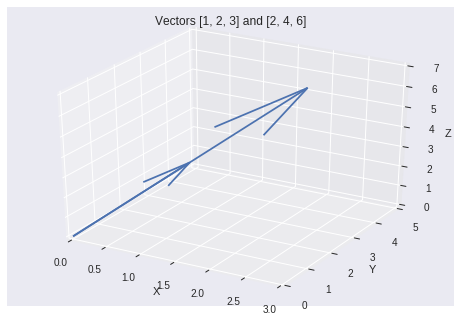

In [0]:
from mpl_toolkits.mplot3d import Axes3D
# linearly dependent vectors
vector_1d = [1, 2, 3]
vector_2d = [2, 4, 6]

vectors = np.array([[0, 0, 0, 1, 2, 3], 
                    [0, 0, 0, 2, 4, 6]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 3])
ax.set_ylim([0, 5])
ax.set_zlim([0, 7])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Vectors [1, 2, 3] and [2, 4, 6]")
plt.show()

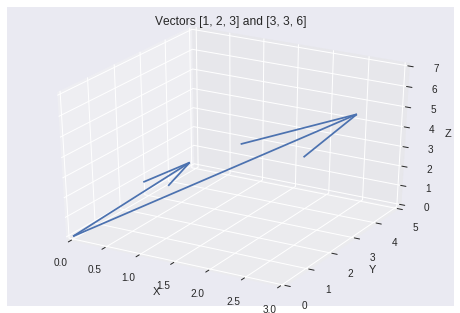

In [0]:
# linearly independent vectors
vector_1i = [1, 2, 3]
vector_2i = [3, 3, 6]

vectors = np.array([[0, 0, 0, 1, 2, 3], 
                    [0, 0, 0, 3, 3, 6]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 3])
ax.set_ylim([0, 5])
ax.set_zlim([0, 7])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Vectors [1, 2, 3] and [3, 3, 6]")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
vector_g = [1, 2]
vector_h = [4, 8]
np.array(vector_h) / np.array(vector_g)
# These are linearly dependent vectors so they will simply reside on the line that contains them

array([4., 4.])

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# These are linearly independent, not co-linear, so the span is R3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



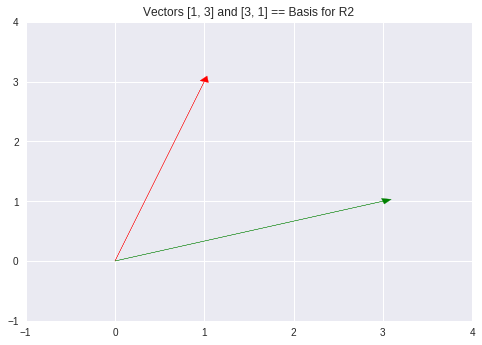

In [0]:
fig = plt.figure()
plt.arrow(0, 0, 1, 3, head_width=0.1, head_length=0.1, color="red")
plt.arrow(0, 0, 3, 1, head_width=0.1, head_length=0.1, color="green")

plt.xlim(-1, 4)          
plt.ylim(-1, 4)
plt.title("Vectors [1, 3] and [3, 1] == Basis for R2")
plt.show()

## 6.2 What does it mean to form a basis?

**Basis:**

The basis of a vector space  **𝑉**  is a set of vectors that are linearly independent and that span the vector space  **𝑉 **.

**Orthogonal Basis:**

An orthogonal basis is a set of vectors that are linearly independent, span the vector space, and are orthogonal to each other.

**Orthonormal Basis**

An orthonormal basis is a set of vectors that are linearly independent, span the vector space, are orthogonal to eachother and each have unit length.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
P = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]])
print("Matrix:\n", P, "\nhas rank:", np.linalg.matrix_rank(P))

Matrix:
 [[ 1  2  3]
 [-1  0  7]
 [ 4  8  2]] 
has rank: 3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space spanned by its columns

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

**𝑝𝑟𝑜𝑗𝐿(𝑤) = ((𝑤⋅𝑣) / (𝑣⋅𝑣)) x 𝑣**

In [3]:
v = np.array([1, 3])
w = np.array([-1, 2])

proj_subL_w = (np.dot(w,v) / np.dot(v,v)) * v
print("Projected vector", proj_subL_w)

Projected vector [0.5 1.5]


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


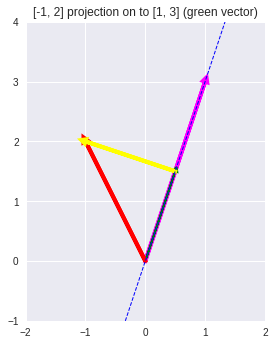

In [9]:
# Axis Bounds
plt.xlim(-2, 2)          
plt.ylim(-1, 4)

# Original Vector diff
w_minus_proj = w - proj_subL_w

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, v[0], v[1], linewidth=4, head_width=.075, head_length=0.075, color ='magenta')
plt.arrow(0, 0, proj_subL_w[0], proj_subL_w[1], linewidth=2, head_width=.075, head_length=0.075, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=4, head_width=.075, head_length=0.075, color ='red')
plt.arrow(proj_subL_w[0], proj_subL_w[1], w_minus_proj[0], w_minus_proj[1], linewidth=4, head_width=.075, head_length=0.075, color = 'yellow')

plt.title("[-1, 2] projection on to [1, 3] (green vector)")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

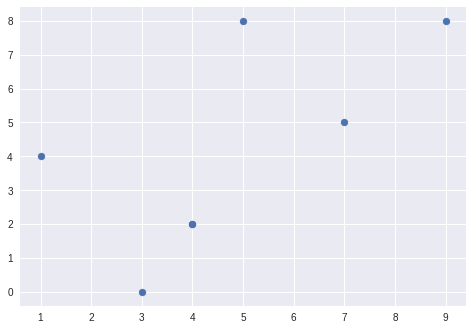

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()